In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
from numpy.random import default_rng  # a default random number generator

In [2]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

#### Helper Functions

In [3]:
# @title Plotting functions

def plot_hist(data, xlabel, figtitle = None, num_bins = None):
  """ Plot the given data as a histogram.

    Args:
      data (ndarray): array with data to plot as histogram
      xlabel (str): label of x-axis
      figtitle (str): title of histogram plot (default is no title)
      num_bins (int): number of bins for histogram (default is 10)

    Returns:
      count (ndarray): number of samples in each histogram bin
      bins (ndarray): center of each histogram bin
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Count')
  if num_bins is not None:
    count, bins, _ = plt.hist(data, max(data), bins=num_bins)
  else:
    count, bins, _ = plt.hist(data, max(data))  # 10 bins default
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()
  return count, bins


def plot_gaussian_samples_true(samples, xspace, mu, sigma, xlabel, ylabel):
  """ Plot a histogram of the data samples on the same plot as the gaussian
  distribution specified by the give mu and sigma values.

    Args:
      samples (ndarray): data samples for gaussian distribution
      xspace (ndarray): x values to sample from normal distribution
      mu (scalar): mean parameter of normal distribution
      sigma (scalar): variance parameter of normal distribution
      xlabel (str): the label of the x-axis of the histogram
      ylabel (str): the label of the y-axis of the histogram

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  # num_samples = samples.shape[0]

  count, bins, _ = plt.hist(samples, density=True)  # probability density function

  plt.plot(xspace, norm.pdf(xspace, mu, sigma), 'r-')
  plt.show()


def plot_likelihoods(likelihoods, mean_vals, variance_vals):
  """ Plot the likelihood values on a heatmap plot where the x and y axes match
  the mean and variance parameter values the likelihoods were computed for.

    Args:
      likelihoods (ndarray): array of computed likelihood values
      mean_vals (ndarray): array of mean parameter values for which the
                            likelihood was computed
      variance_vals (ndarray): array of variance parameter values for which the
                            likelihood was computed

    Returns:
      Nothing.
  """
  fig, ax = plt.subplots()
  im = ax.imshow(likelihoods)

  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel('log likelihood', rotation=-90, va="bottom")

  ax.set_xticks(np.arange(len(mean_vals)))
  ax.set_yticks(np.arange(len(variance_vals)))
  ax.set_xticklabels(mean_vals)
  ax.set_yticklabels(variance_vals)
  ax.set_xlabel('Mean')
  ax.set_ylabel('Variance')
  plt.show()


def posterior_plot(x, likelihood=None, prior=None,
                   posterior_pointwise=None, ax=None):
  """
  Plots normalized Gaussian distributions and posterior.

    Args:
        x (numpy array of floats):         points at which the likelihood has been evaluated
        auditory (numpy array of floats):  normalized probabilities for auditory likelihood evaluated at each `x`
        visual (numpy array of floats):    normalized probabilities for visual likelihood evaluated at each `x`
        posterior (numpy array of floats): normalized probabilities for the posterior evaluated at each `x`
        ax: Axis in which to plot. If None, create new axis.

    Returns:
        Nothing.
  """
  if likelihood is None:
      likelihood = np.zeros_like(x)

  if prior is None:
      prior = np.zeros_like(x)

  if posterior_pointwise is None:
      posterior_pointwise = np.zeros_like(x)

  if ax is None:
    fig, ax = plt.subplots()

  ax.plot(x, likelihood, '-C1', linewidth=2, label='Auditory')
  ax.plot(x, prior, '-C0', linewidth=2, label='Visual')
  ax.plot(x, posterior_pointwise, '-C2', linewidth=2, label='Posterior')
  ax.legend()
  ax.set_ylabel('Probability')
  ax.set_xlabel('Orientation (Degrees)')
  plt.show()

  return ax


def plot_classical_vs_bayesian_normal(num_points, mu_classic, var_classic,
                                      mu_bayes, var_bayes):
  """ Helper function to plot optimal normal distribution parameters for varying
  observed sample sizes using both classic and Bayesian inference methods.

    Args:
      num_points (int): max observed sample size to perform inference with
      mu_classic (ndarray): estimated mean parameter for each observed sample size
                                using classic inference method
      var_classic (ndarray): estimated variance parameter for each observed sample size
                                using classic inference method
      mu_bayes (ndarray): estimated mean parameter for each observed sample size
                                using Bayesian inference method
      var_bayes (ndarray): estimated variance parameter for each observed sample size
                                using Bayesian inference method

    Returns:
      Nothing.
  """
  xspace = np.linspace(0, num_points, num_points)
  fig, ax = plt.subplots()
  ax.set_xlabel('n data points')
  ax.set_ylabel('mu')
  plt.plot(xspace, mu_classic,'r-', label="Classical")
  plt.plot(xspace, mu_bayes,'b-', label="Bayes")
  plt.legend()
  plt.show()

  fig, ax = plt.subplots()
  ax.set_xlabel('n data points')
  ax.set_ylabel('sigma^2')
  plt.plot(xspace, var_classic,'r-', label="Classical")
  plt.plot(xspace, var_bayes,'b-', label="Bayes")
  plt.legend()
  plt.show()

#### Ex1 Markov Chains

In [11]:
###################################################################
## compute state probabilities after 4 transitions ##
###################################################################

# Transition matrix
transition_matrix = np.array([[ 0.2, 0.6, 0.2], [ .6, 0.3, 0.1], [0.8, 0.2, 0]])

# Initial state, p0
p0 = np.array([0, 1, 0])

# Compute the probabilities 4 transitions later (use np.linalg.matrix_power to raise a matrix a power)
p4 = p0 @ np.linalg.matrix_power(transition_matrix, 4)

# The second area is indexed as 1 (Python starts indexing at 0)
print(f"The probability the rat will be in area 2 after 4 transitions is: {p4[1]}")


# Initialize random initial distribution
p_random = np.ones((1, 3))/3

###################################################################
## compute the state matrix after 100 transitions
###################################################################

# Fill in the missing line to get the state matrix after 100 transitions, like above
p_average_time_spent = p_random @ np.linalg.matrix_power(transition_matrix, 100)
print(f"The proportion of time spend by the rat in each of the three states is: {p_average_time_spent[0]}")

The probability the rat will be in area 2 after 4 transitions is: 0.4311
The proportion of time spend by the rat in each of the three states is: [0.44736842 0.42105263 0.13157895]


#### Ex2 Likelihood

In [12]:
def compute_likelihood_normal(x, mean_val, standard_dev_val):
  """ Computes the log-likelihood values given a observed data sample x, and
  potential mean and variance values for a normal distribution

    Args:
      x (ndarray): 1-D array with all the observed data
      mean_val (scalar): value of mean for which to compute likelihood
      standard_dev_val (scalar): value of variance for which to compute likelihood

    Returns:
      likelihood (scalar): value of likelihood for this combination of means/variances
  """

  # Get probability of each data point (use norm.pdf from scipy stats)
  p_data = norm.pdf(x, mean_val, standard_dev_val)

  # Compute likelihood (sum over the log of the probabilities)
  likelihood = np.sum(np.log(p_data))

  return likelihood

# Set random seed
np.random.seed(0)

# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size = (n_samples,))

# Compute likelihood for a guessed mean/standard dev
guess_mean = 4
guess_standard_dev = .1
likelihood = compute_likelihood_normal(x, guess_mean, guess_standard_dev)
print(likelihood)

-92904.81398544145


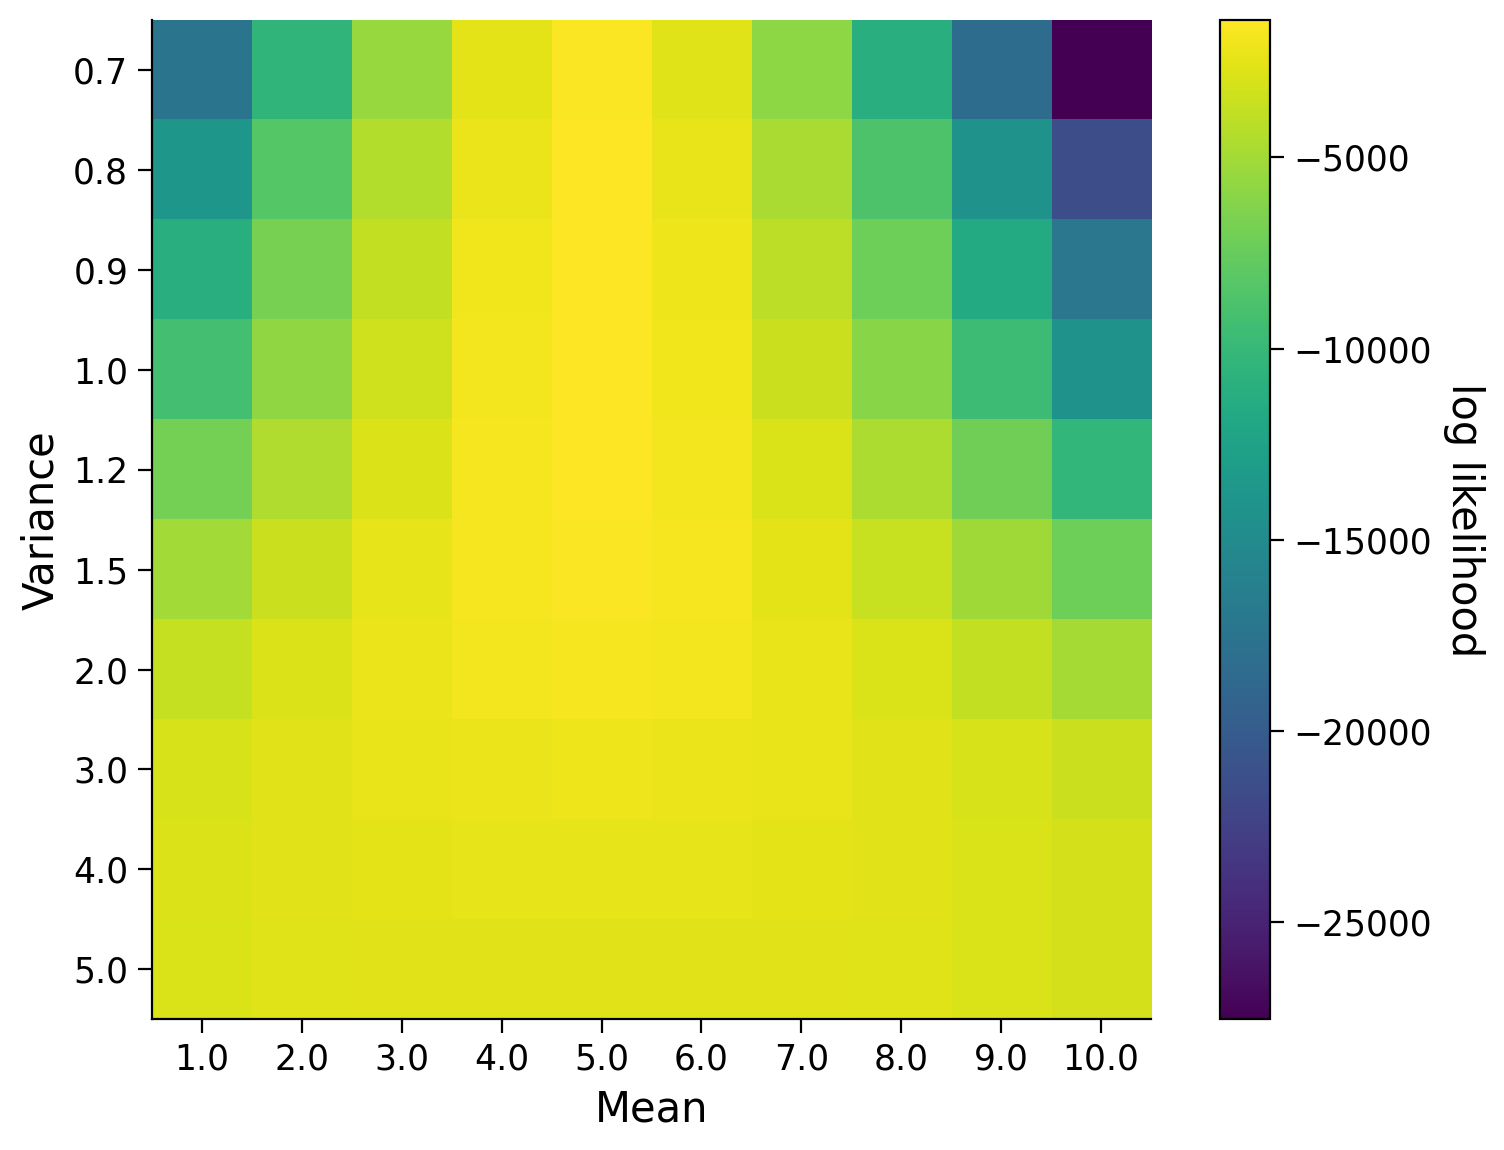

In [13]:
# @markdown Execute to visualize likelihoods

# Set random seed
np.random.seed(0)

# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size = (n_samples,))


# Compute likelihood for different mean/variance values
mean_vals = np.linspace(1, 10, 10) # potential mean values to ry
standard_dev_vals = np.array([0.7, 0.8, 0.9, 1, 1.2, 1.5, 2, 3, 4, 5]) # potential variance values to try

# Initialise likelihood collection array
likelihood = np.zeros((mean_vals.shape[0], standard_dev_vals.shape[0]))

# Compute the likelihood for observing the gvien data x assuming
# each combination of mean and variance values
for idxMean in range(mean_vals.shape[0]):
  for idxVar in range(standard_dev_vals .shape[0]):
    likelihood[idxVar,idxMean]= sum(np.log(norm.pdf(x, mean_vals[idxMean],
                                              standard_dev_vals[idxVar])))

# Uncomment once you've generated the samples and compute likelihoods
xspace = np.linspace(0, 10, 100)
plot_likelihoods(likelihood, mean_vals, standard_dev_vals)

In [14]:
# @markdown Make sure you execute this cell to enable the widget and fit by hand!
# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
vals = np.random.normal(true_mean, true_standard_dev, size = (n_samples,))

def plotFnc(mu,sigma):
  loglikelihood= sum(np.log(norm.pdf(vals,mu,sigma)))
  #calculate histogram

  #prepare to plot
  fig, ax = plt.subplots()
  ax.set_xlabel('x')
  ax.set_ylabel('probability')

  #plot histogram
  count, bins, ignored = plt.hist(vals,density=True)
  x = np.linspace(0,10,100)

  #plot pdf
  plt.plot(x, norm.pdf(x,mu,sigma),'r-')
  plt.show()
  print("The log-likelihood for the selected parameters is: " + str(loglikelihood))

#interact(plotFnc, mu=5.0, sigma=2.1);
#interact(plotFnc, mu=widgets.IntSlider(min=0.0, max=10.0, step=1, value=4.0),sigma=widgets.IntSlider(min=0.1, max=10.0, step=1, value=4.0));
interact(plotFnc, mu=(0.0, 15.0, 0.1),sigma=(0.1, 5.0, 0.1));

interactive(children=(FloatSlider(value=7.5, description='mu', max=15.0), FloatSlider(value=2.5000000000000004…

In [27]:
# We define the function to optimise, the negative log likelihood
def negLogLike(theta, x):
  """ Function for computing the negative log-likelihood given the observed data
      and given parameter values stored in theta.

      Args:
        theta (ndarray): normal distribution parameters
                        (mean is theta[0], standard deviation is theta[1])
        x (ndarray): array with observed data points

      Returns:
        Calculated negative Log Likelihood value!
  """
  ###################################################################
  ## Compute the negative log-likelihood value for the
  ## given observed data values and parameters (theta)
  ###################################################################
  return -compute_likelihood_normal(x, theta[0], theta[1])

# Set random seed
np.random.seed(0)

# Generate data
true_mean = -5
true_standard_dev = 15
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size=(n_samples, ))
print(np.mean(x), np.std(x))
# Define bounds, var has to be positive
bnds = ((-10, 10), (0.4, 20))
#bnds = ((None, None), (0, None))
# Optimize with scipy!
optimal_parameters = sp.optimize.minimize(negLogLike, (2, 2), args=x, bounds=bnds)
print(f"The optimal mean estimate is: {optimal_parameters.x[0]}")
print(f"The optimal standard deviation estimate is: {optimal_parameters.x[1]}")

# optimal_parameters contains a lot of information about the optimization,
# but we mostly want the mean and standard deviation

-5.678850612352932 14.805497380035387
The optimal mean estimate is: -5.678843463458269
The optimal standard deviation estimate is: 14.805498599671372


#### Ex3 Bayesian Inference

The mean of the data comprising the prior is: 5.0
The variance of the data comprising the prior is: 1.0


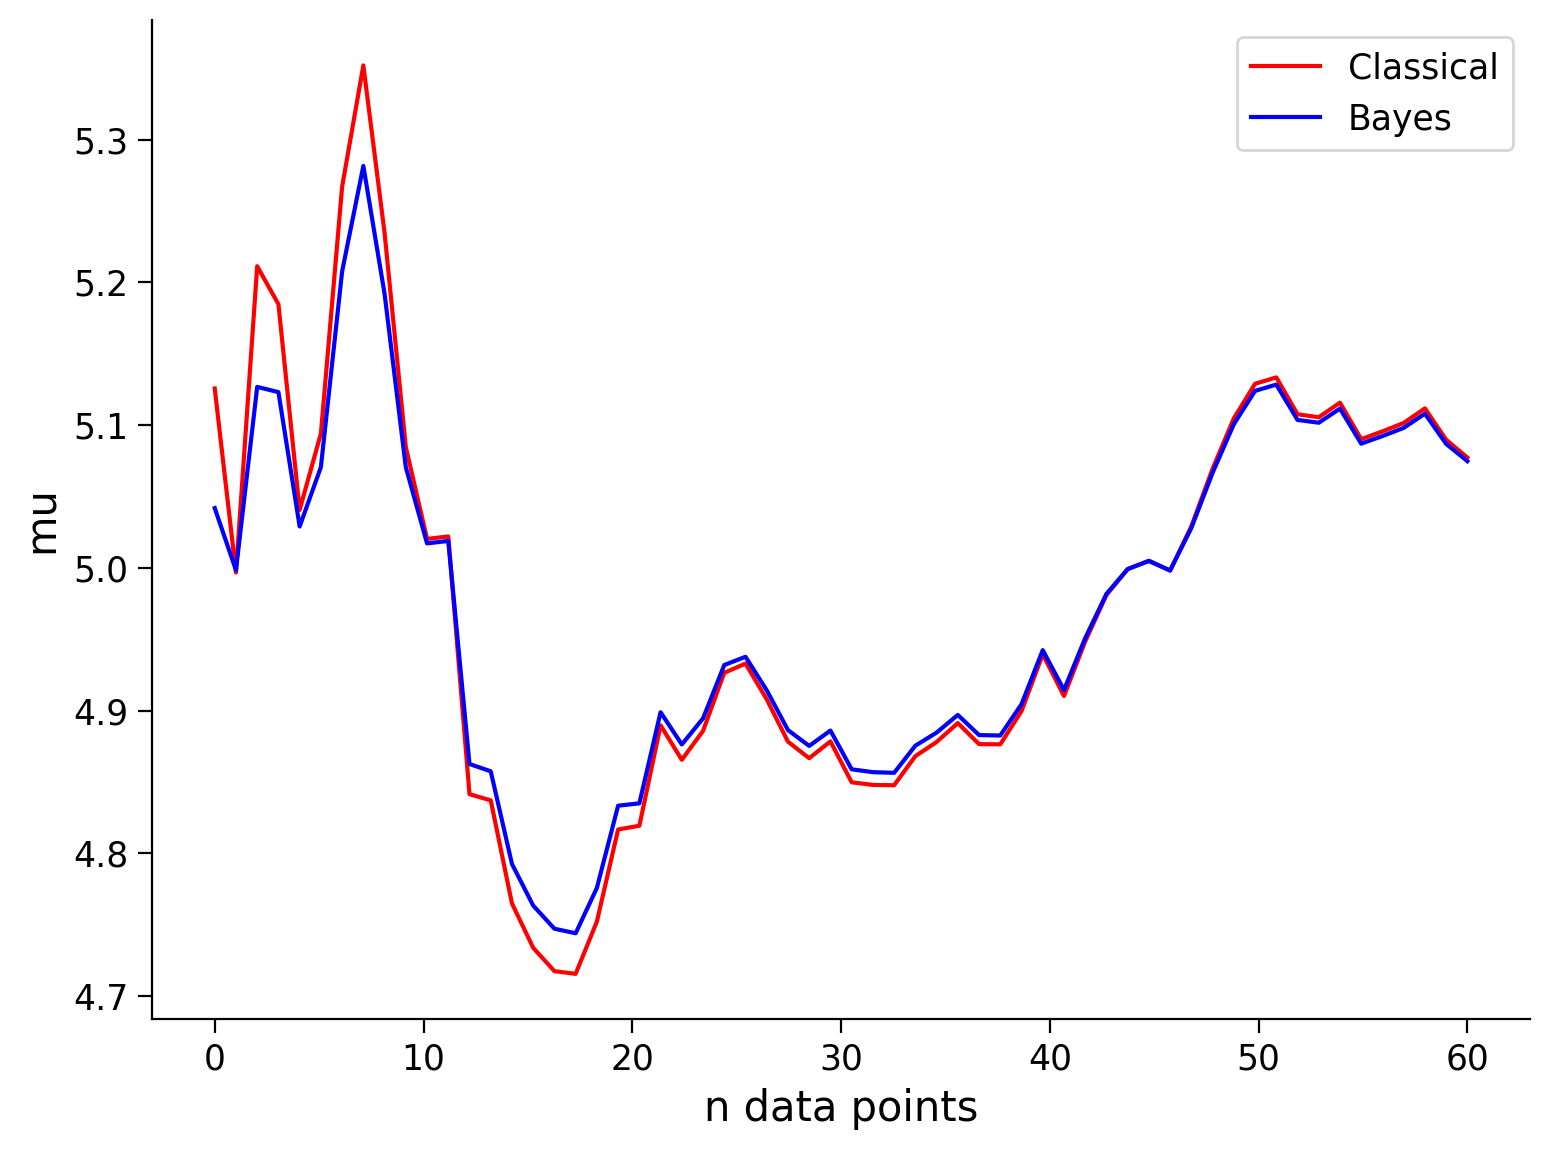

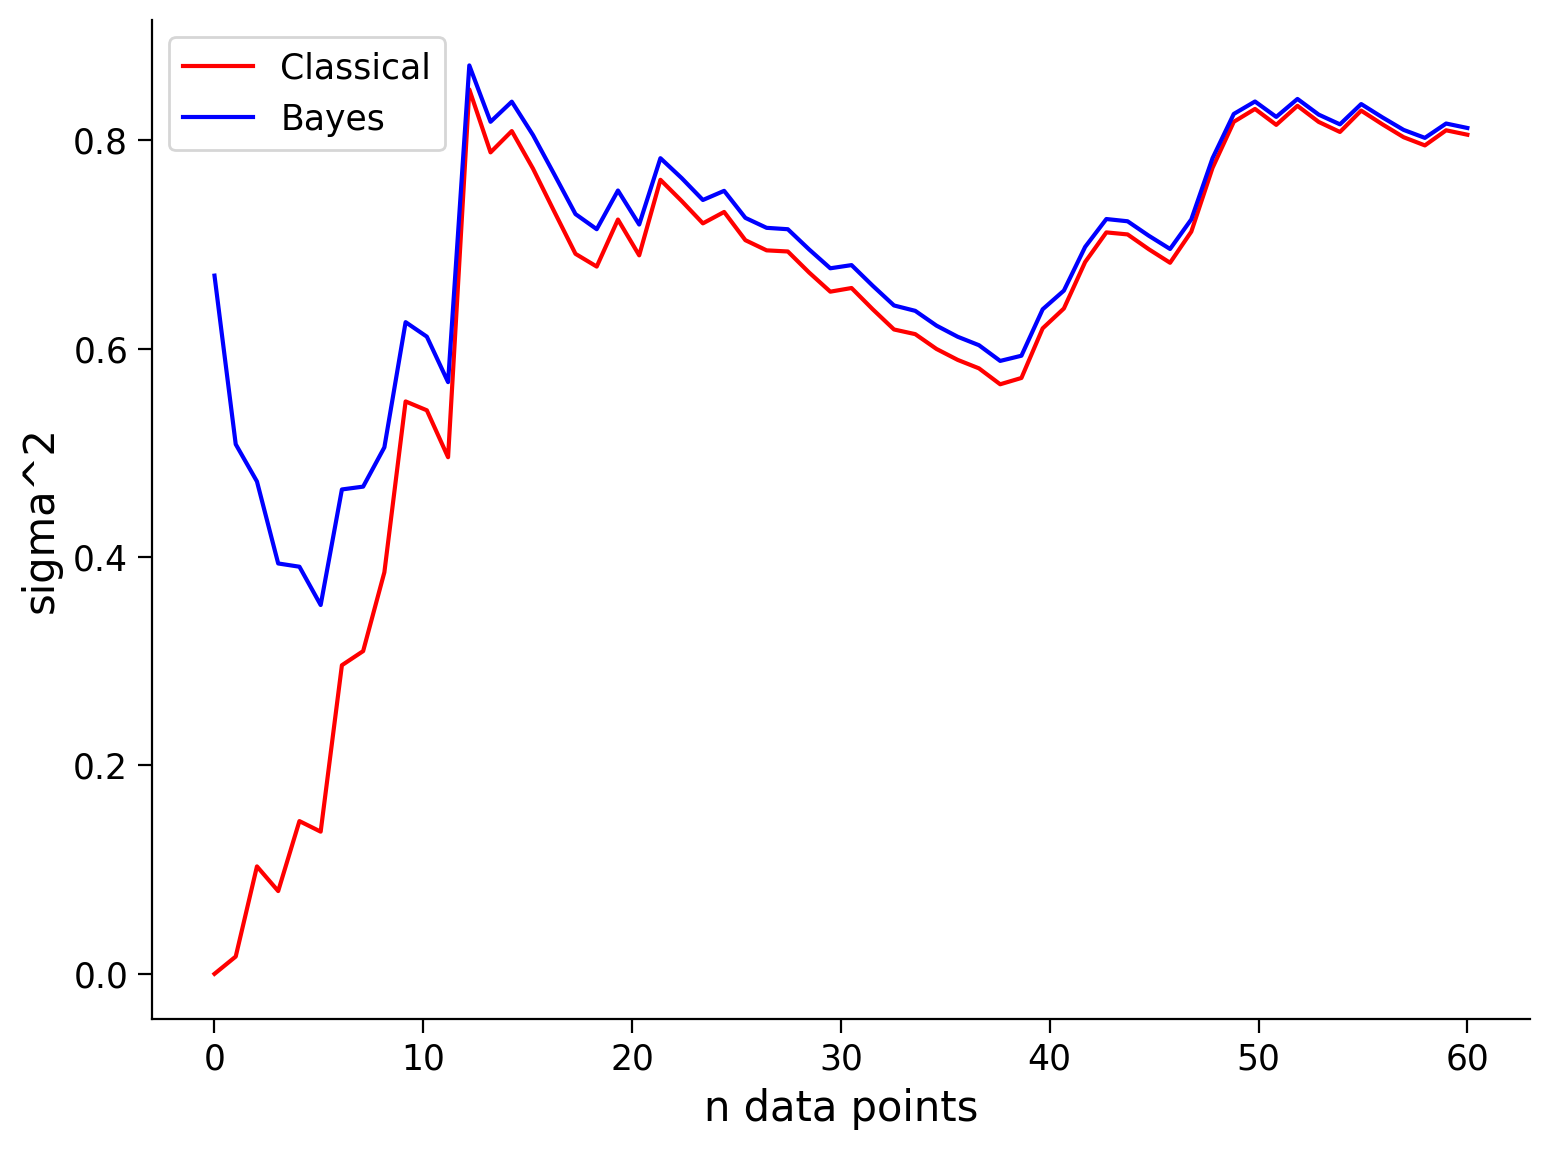

In [28]:
# @markdown Execute to visualize inference

def classic_vs_bayesian_normal(mu, sigma, num_points, prior):
  """ Compute both classical and Bayesian inference processes over the range of
  data sample sizes (num_points) for a normal distribution with parameters
  mu,sigma for comparison.

  Args:
    mu (scalar): the mean parameter of the normal distribution
    sigma (scalar): the standard deviation parameter of the normal distribution
    num_points (int): max number of points to use for inference
    prior (ndarray): prior data points for Bayesian inference

  Returns:
    mean_classic (ndarray): estimate mean parameter via classic inference
    var_classic (ndarray): estimate variance parameter via classic inference
    mean_bayes (ndarray): estimate mean parameter via Bayesian inference
    var_bayes (ndarray): estimate variance parameter via Bayesian inference
  """

  # Initialize the classical and Bayesian inference arrays that will estimate
  # the normal parameters given a certain number of randomly sampled data points
  mean_classic = np.zeros(num_points)
  var_classic = np.zeros(num_points)

  mean_bayes = np.zeros(num_points)
  var_bayes = np.zeros(num_points)

  for nData in range(num_points):

    random_num_generator = default_rng(0)
    x = random_num_generator.normal(mu, sigma, nData + 1)

    # Compute the mean of those points and set the corresponding array entry to this value
    mean_classic[nData] = np.mean(x)

    # Compute the variance of those points and set the corresponding array entry to this value
    var_classic[nData] = np.var(x)

    # Bayesian inference with the given prior is performed below for you
    xsupp = np.hstack((x, prior))
    mean_bayes[nData] = np.mean(xsupp)
    var_bayes[nData] = np.var(xsupp)

  return mean_classic, var_classic, mean_bayes, var_bayes

# Set random seed
np.random.seed(0)

# Set normal distribution parameters, mu and sigma
mu = 5
sigma = 1

# Set the prior to be two new data points, 4 and 6, and print the mean and variance
prior = np.array((4, 6))
print("The mean of the data comprising the prior is: " + str(np.mean(prior)))
print("The variance of the data comprising the prior is: " + str(np.var(prior)))

mean_classic, var_classic, mean_bayes, var_bayes = classic_vs_bayesian_normal(mu, sigma, 60, prior)
plot_classical_vs_bayesian_normal(60, mean_classic, var_classic, mean_bayes, var_bayes)

In [31]:

#beta distribution
#and binomial
def plotFnc(p,n,priorL,priorR):
  # Set random seed
  np.random.seed(1)
  #sample from binomial
  numL = np.random.binomial(n, p, 1)
  numR = n - numL
  stepSize=0.001
  x = np.arange(0, 1, stepSize)
  betaPdf=sp.stats.beta.pdf(x,numL+priorL,numR+priorR)
  betaPrior=sp.stats.beta.pdf(x,priorL,priorR)
  print("number of left "+str(numL))
  print("number of right "+str(numR))
  print(" ")
  print("max likelihood "+str(numL/(numL+numR)))
  print(" ")
  print("max posterior " + str(x[np.argmax(betaPdf)]))
  print("mean posterior " + str(np.mean(betaPdf*x)))


  print(" ")

  with plt.xkcd():
    #rng.beta()
    fig, ax = plt.subplots()
    plt.rcParams.update({'font.size': 22})
    ax.set_xlabel('p')
    ax.set_ylabel('probability density')
    plt.plot(x,betaPdf, label = "Posterior")
    plt.plot(x,betaPrior, label = "Prior")
    #print(int(len(betaPdf)/2))
    plt.legend()





interact(plotFnc, p=(0, 1, 0.01),n=(1, 50, 1), priorL=(0, 10, 1),priorR=(0, 10, 1))

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.01), IntSlider(value=25, descrip…

<function __main__.plotFnc(p, n, priorL, priorR)>

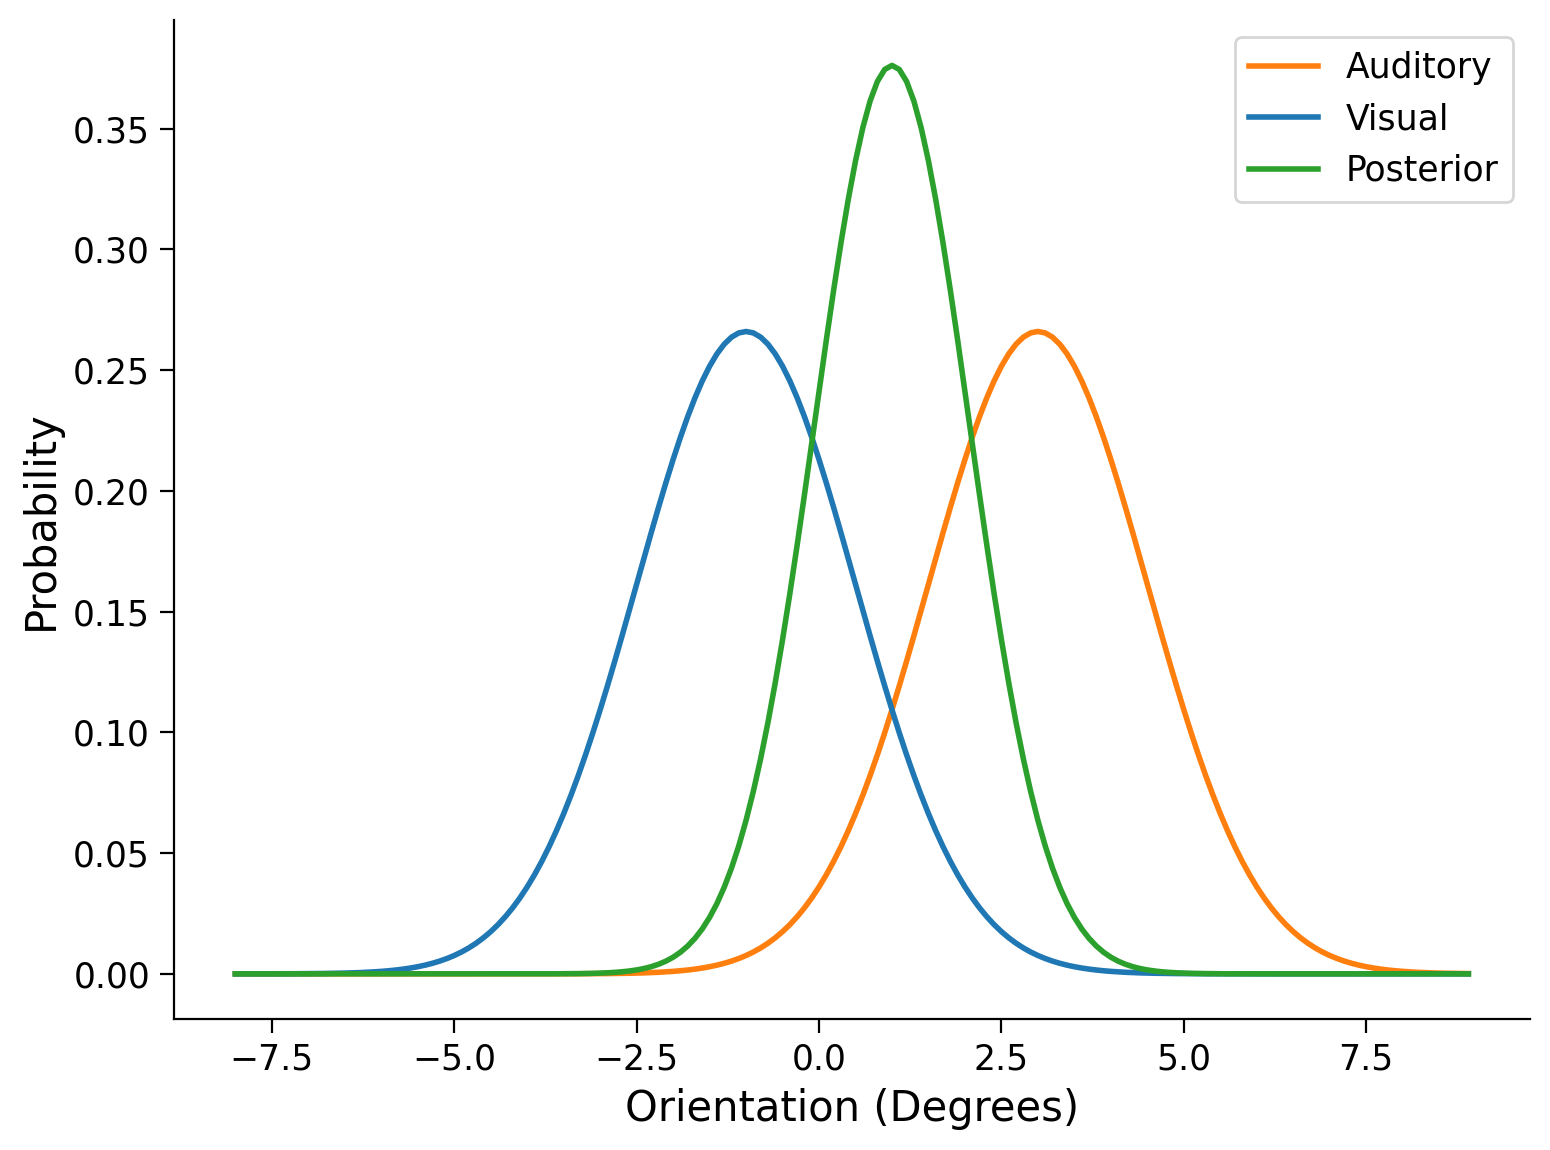

In [35]:
def my_gaussian(x_points, mu, sigma):
  """ Returns normalized Gaussian estimated at points `x_points`, with parameters:
  mean `mu` and standard deviation `sigma`

  Args:
      x_points (ndarray of floats): points at which the gaussian is evaluated
      mu (scalar): mean of the Gaussian
      sigma (scalar): standard deviation of the gaussian

  Returns:
      (numpy array of floats) : normalized Gaussian evaluated at `x`
  """
  px = 1/(2*np.pi*sigma**2)**1/2 *np.exp(-(x_points-mu)**2/(2*sigma**2))

  # as we are doing numerical integration we may have to remember to normalise
  # taking into account the stepsize (0.1)
  px = px/(0.1*sum(px))
  return px


def compute_posterior_pointwise(prior, likelihood):
  """ Compute the posterior probability distribution point-by-point using Bayes
  Rule.

    Args:
      prior (ndarray): probability distribution of prior
      likelihood (ndarray): probability distribution of likelihood

    Returns:
      posterior (ndarray): probability distribution of posterior
  """

  posterior = prior * likelihood
  posterior = posterior / (0.1 * np.sum(posterior))  # normalize
  return posterior


def localization_simulation(mu_auditory=3.0, sigma_auditory=1.5,
                            mu_visual=-1.0, sigma_visual=1.5):
  """ Perform a sound localization simulation with an auditory prior.

    Args:
      mu_auditory (float): mean parameter value for auditory prior
      sigma_auditory (float): standard deviation parameter value for auditory
                                prior
      mu_visual (float): mean parameter value for visual likelihood distribution
      sigma_visual (float): standard deviation parameter value for visual
                                likelihood distribution

    Returns:
      x (ndarray): range of values for which to compute probabilities
      auditory (ndarray): probability distribution of the auditory prior
      visual (ndarray): probability distribution of the visual likelihood
      posterior_pointwise (ndarray): posterior probability distribution
  """
  
  x = np.arange(-8, 9, 0.1)

  auditory = my_gaussian(x, mu_auditory, sigma_auditory)
  visual = my_gaussian(x, mu_visual, sigma_visual)
  posterior = compute_posterior_pointwise(visual, auditory)

  return x, auditory, visual, posterior


x, auditory, visual, posterior_pointwise=localization_simulation()
_ = posterior_plot(x, auditory, visual, posterior_pointwise)

#### Ex4 Bayes Net

In [37]:
##############################################################################
# Write code to insert the correct conditional probabilities
##############################################################################

Pw1r1s1 = 0.999  # the probability of wet grass given rain and sprinklers on
Pw1r1s0 = 0.99  # the probability of wet grass given rain and sprinklers off
Pw1r0s1 = 0.9  # the probability of wet grass given no rain and sprinklers on
Pw1r0s0 = 0.001  # the probability of wet grass given no rain and sprinklers off
Ps = 0.25 # the probability of the sprinkler being on
Pr = 0.1 # the probability of rain that day


# Calculate A and B
A = Ps * (Pw1r1s1 * Pr + (Pw1r0s1) * (1 - Pr))
B = (1 - Ps) * (Pw1r1s0 *Pr + (Pw1r0s0) * (1 - Pr))
print(f"Given that the grass is wet, the probability the sprinkler was on is: {A/(A + B):.4f}")

Given that the grass is wet, the probability the sprinkler was on is: 0.7522
